In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Question 1

In [3]:
print('I have installed ' + np.__version__ + ' of Numpy.')

I have installed 1.21.5 of Numpy.


In [4]:
# Load the car dataset
df_car = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/car.csv')

In [22]:
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


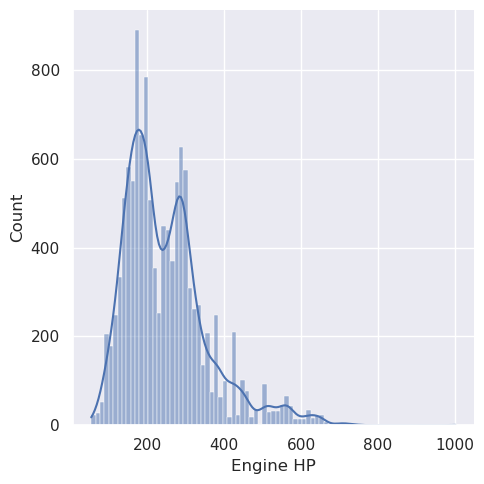

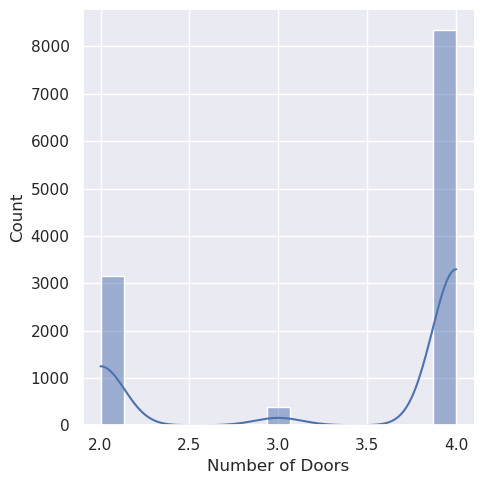

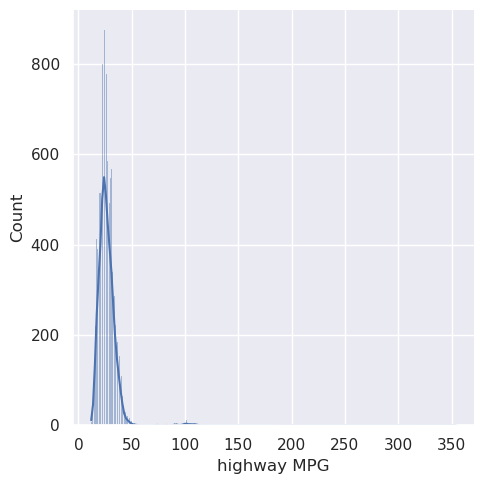

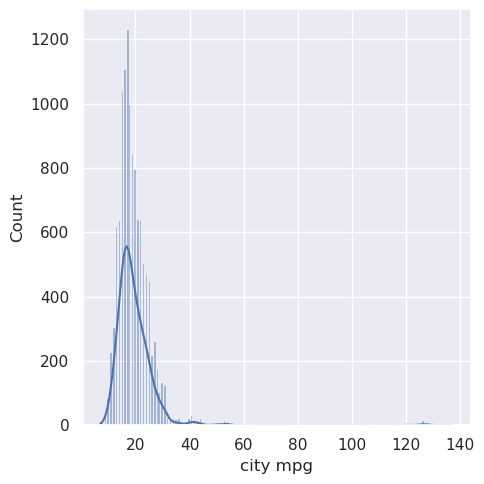

In [28]:
sns.displot(df_car['Engine HP'], kde=True)
sns.displot(df_car['Number of Doors'], kde=True)
sns.displot(df_car['highway MPG'], kde=True)
sns.displot(df_car['city mpg'], kde=True)

Text(0.5, 1.0, 'Cars by Make')

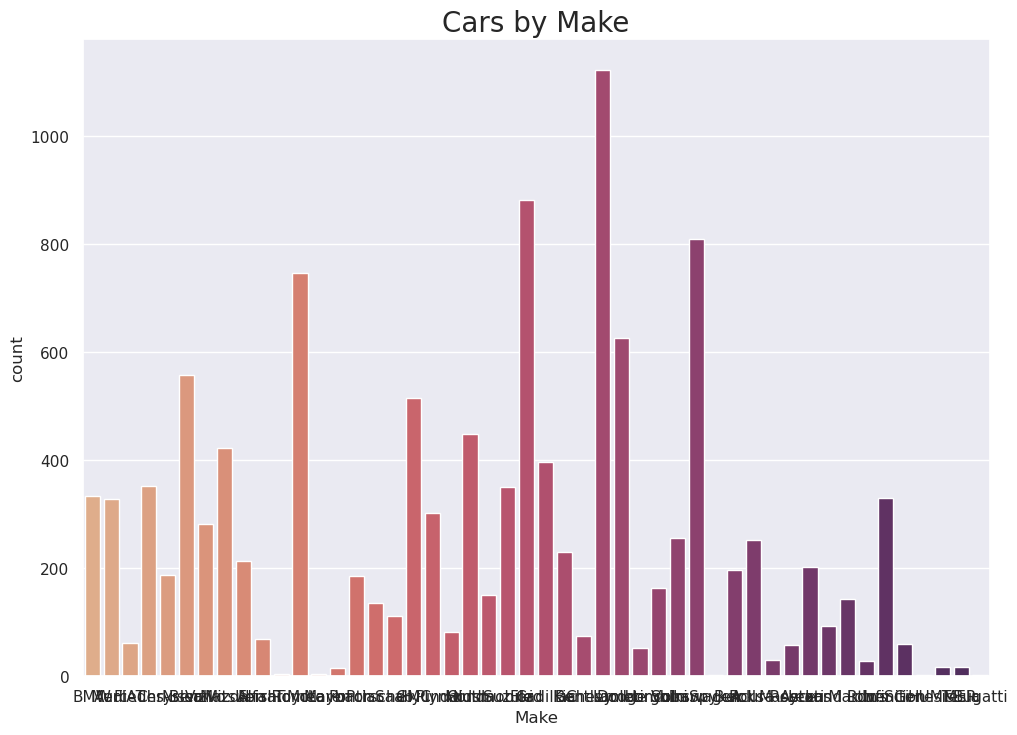

In [29]:
sns.countplot(x = df_car['Make'], palette='flare')
plt.title("Cars by Make",fontsize=20)

### Question 2

In [178]:
df_car.shape

(11914, 16)

### Question 3

In [23]:
# most frequent car manufacturers (top-3) according to the dataset
top_3_makes = df_car.groupby('Make')['Make'].count().sort_values(ascending = False).nlargest(3)
print(top_3_makes)

Make
Chevrolet     1123
Ford           881
Volkswagen     809
Name: Make, dtype: int64


In [25]:
type(top_3_makes)

pandas.core.series.Series

### Question 4

In [180]:
# unique Audi car models in the dataset
df_audi_cars = df_car.loc[df_car['Make'] == 'Audi']
df_audi_cars.groupby('Make')['Model'].nunique()

Make
Audi    34
Name: Model, dtype: int64

### Question 5

In [181]:
df_car.isna().sum().sort_values(ascending = False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Question 6

In [182]:
# Find the median value of "Engine Cylinders" column in the dataset.
engine_cylinders_median = round(df_car['Engine Cylinders'].median(),1)
print(engine_cylinders_median)

6.0


In [183]:
# Calculate the most frequent value of the same "Engine Cylinders".
engine_cylinders_mode = round(df_car['Engine Cylinders'].mode(),1)
print(engine_cylinders_mode)

0    4.0
Name: Engine Cylinders, dtype: float64


In [184]:
# Use the fillna method to fill the missing values in "Engine Cylinders" 
# with the most frequent value from the previous step.
df_car['Engine Cylinders'] = df_car['Engine Cylinders'].fillna(engine_cylinders_mode)

In [185]:
# Calculate the median value of "Engine Cylinders" once again.
engine_cylinders_median1 = round(df_car['Engine Cylinders'].median(),1)
print(engine_cylinders_median1)

6.0


### Question 7

In [186]:
# Select all the "Lotus" cars from the dataset.
df_lotus_cars = df_car[df_car['Make'] == 'Lotus']

In [187]:
# Select only columns "Engine HP", "Engine Cylinders".
df_lotus_cars = df_lotus_cars[['Engine HP','Engine Cylinders']]
# Drop duplicates
df_lotus_cars = df_lotus_cars.drop_duplicates()

In [188]:
# Count remaining rows (9)
df_lotus_cars.shape

(9, 2)

In [189]:
df_lotus_cars.head()

,Engine HP,Engine Cylinders
3912,189.0,4.0
3913,218.0,4.0
3918,217.0,4.0
4216,350.0,8.0
4257,400.0,6.0


In [190]:
# Get the underlying NumPy array. Let's call it X.
X = df_lotus_cars.to_numpy()
print(X)

[[189.   4.]
 [218.   4.]
 [217.   4.]
 [350.   8.]
 [400.   6.]
 [276.   6.]
 [345.   6.]
 [257.   4.]
 [240.   4.]]


In [191]:
type(X)

numpy.ndarray

In [192]:
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. 
# Let's call the result XTX.
XTX = X.T.dot(X)

In [193]:
# Invert XTX.
XTX_inv = np.linalg.inv(XTX)

In [194]:
# Create an array y with values [1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800].
y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])

In [195]:
# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
# What's the value of the first element of w?
w = XTX_inv.dot(X.T).dot(y)
print(w)

[  4.59494481 -63.56432501]
